Project Title : Climate Change Modeling

Tools         : Jupyter Notebook and VS code

Technologies  : Machine learning

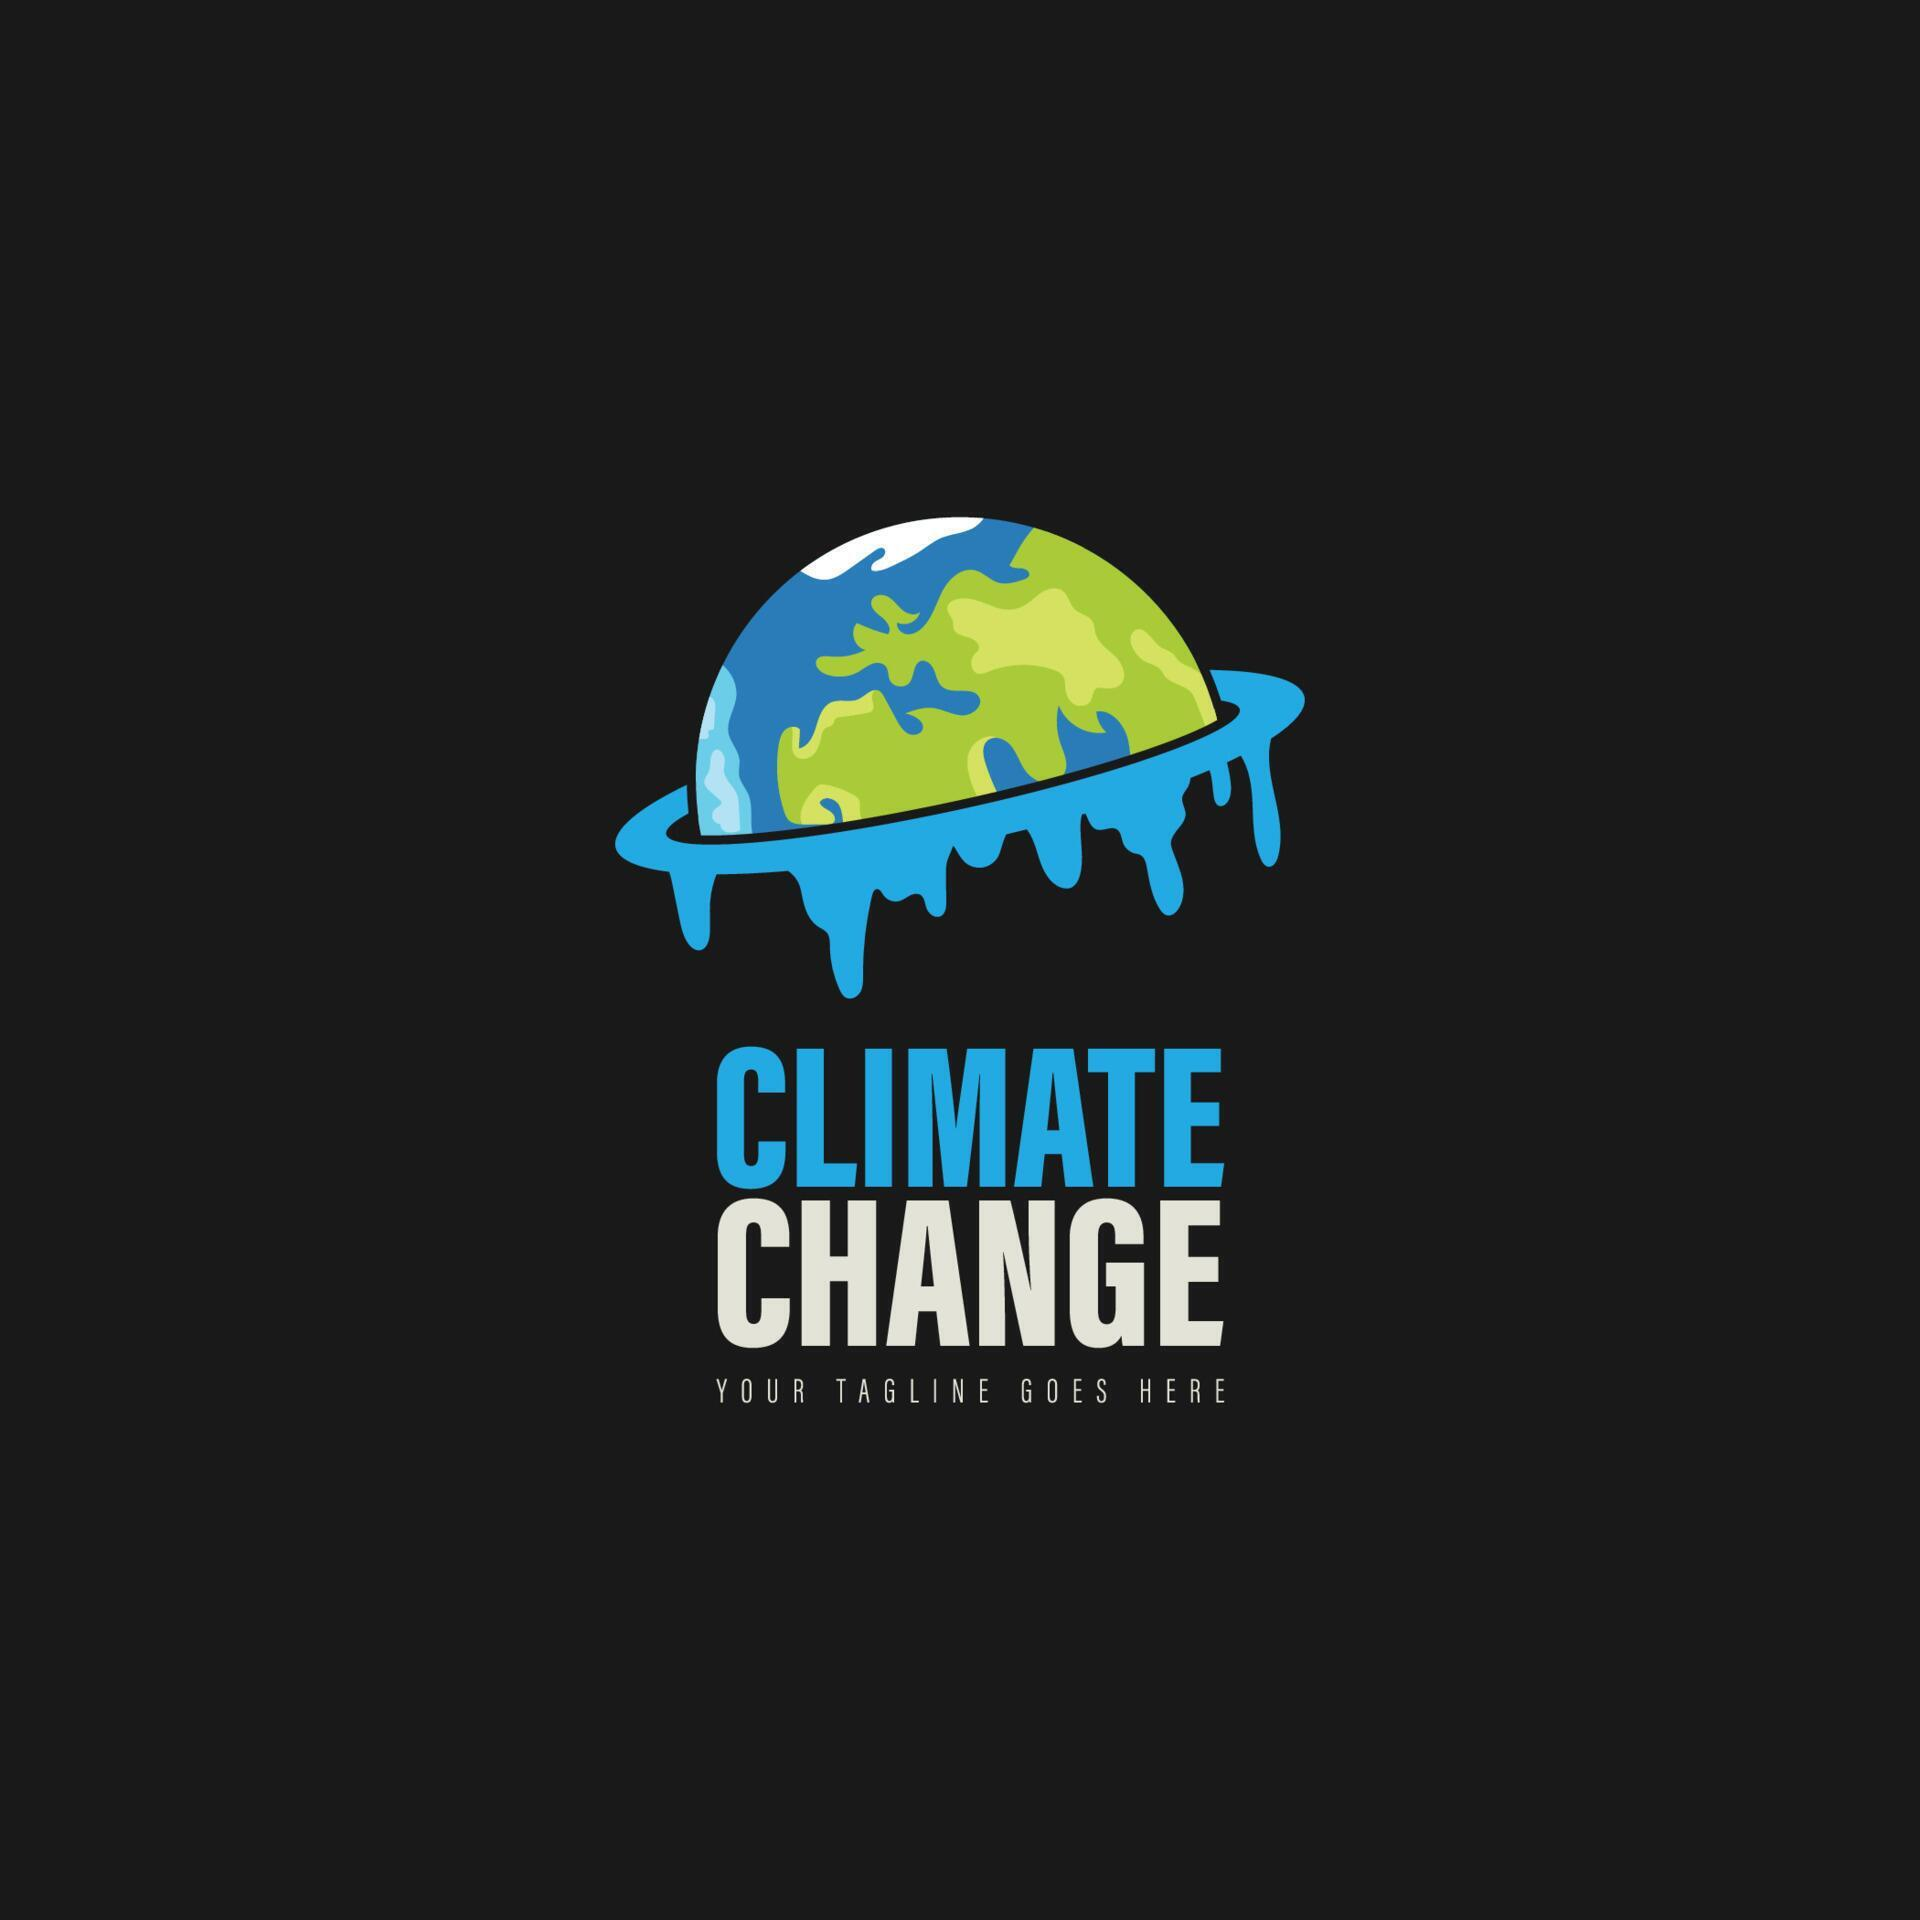

In [ ]:
# Importing Libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from subprocess import check_output

In [ ]:
# Importing Dataset
CO2_df = pd.read_csv(r"C:\Users\RAKSHANDA\OneDrive\Documents\archive.csv")
temp_by_city = pd.read_csv(r"C:\Users\RAKSHANDA\Downloads\1..csv")
temp_by_country = pd.read_csv(r"C:\Users\RAKSHANDA\OneDrive\Desktop\TemperaturesByCountry.csv")
temp_by_major_city = pd.read_csv(r"C:\Users\RAKSHANDA\OneDrive\Desktop\TemperaturesByMajorCity.csv")
temp_by_state = pd.read_csv(r"C:\Users\RAKSHANDA\OneDrive\Desktop\TemperaturesByState.csv")
global_temp = pd.read_csv(r"C:\Users\RAKSHANDA\OneDrive\Desktop\global temp 3.csv")

## What are the issues will I be addressing on this EDA?
Only CO2 levels in the atmosphere and related temperature variations worldwide will be covered by this dataset. Below is an explanation of the data and how it was collected:

##### The "Keeling Curve," or carbon dioxide record from Mauna Loa Observatory, is the longest continuous record of atmospheric carbon dioxide concentrations in the world. In remote areas, scientists monitor the atmosphere to take samples of air that are typical of a significant portion of the Earth's atmosphere and comparatively unaffected by local factors.

##### This dataset includes a monthly observation of atmospheric carbon dioxide (or CO2) concentrations from the Mauna Loa Observatory (Hawaii) at a latitude of 19.5, the longitude of -155.6, and elevation of 3397 meters.

##### Columns 1–3: Provide the date in the following redundant formats: year, month and decimal date

##### Column 4: Monthly CO2 concentrations in parts per million (ppm) measured on the 08A calibration scale and collected at 24:00 hours on the fifteenth of each month.

##### Column 5: The fifth column provides the same data after a seasonal adjustment, which involves subtracting from the data a 4-harmonic fit with a linear gain factor to remove the seasonal cycle from carbon dioxide measurements

##### Column 6: The sixth column provides the data with noise removed, generated from a stiff cubic spline function plus 4-harmonic functions with linear gain

##### Column 7: The seventh column is the same data with the seasonal cycle removed.

In [ ]:
CO2_df.head()

,Year,Month,Decimal Date,Carbon Dioxide (ppm),Seasonally Adjusted CO2 (ppm),Carbon Dioxide Fit (ppm),Seasonally Adjusted CO2 Fit (ppm)
0,1958,1,1958.0411,NaN,NaN,NaN,NaN
1,1958,2,1958.1260,NaN,NaN,NaN,NaN
2,1958,3,1958.2027,315.69,314.42,316.18,314.89
3,1958,4,1958.2877,317.45,315.15,317.30,314.98
4,1958,5,1958.3699,317.50,314.73,317.83,315.06


##### * Global Land Temperatures By City


In [ ]:
temp_by_city.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


##### * Global Average Land Temperature by Country

In [ ]:
temp_by_country.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


##### * Global Land Temperatures By Major City

In [ ]:
temp_by_major_city.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


##### *Global Average Land Temperature by State

In [ ]:
temp_by_state.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


#### The Berkeley Earth Surface Temperature Study combines 1.6 billion temperature reports from 16 pre-existing archives. It is nicely packaged and allows for slicing into interesting subsets (for example by country). They publish the source data and the code for the transformations they applied. They also use methods that allow weather observations from a shorter time series to be included, meaning fewer observations need to be thrown away. In this dataset, they have included several files:

Global Land and Ocean-and-Land Temperatures:

Date: starts in 1850 for average land temperature and 1950 for max and min land temperatures and global ocean and land temperatures

LandAverageTemperature: global average land temperature in celsius

LandAverageTemperatureUncertainty: the 95% confidence interval around the average

LandMaxTemperature: global average maximum land temperature in celsius

LandMaxTemperatureUncertainty: the 95% confidence interval around the maximum land temperature

LandMinTemperature: global average minimum land temperature in celsius

LandMinTemperatureUncertainty: the 95% confidence interval around the minimum land temperature

LandAndOceanAverageTemperature: global average land and ocean temperature in celsius

LandAndOceanAverageTemperatureUncertainty: the 95% confidence interval around the global average land and ocean temperature

In [ ]:
global_temp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1850-01-01,0.749,1.105,8.242,1.738,-3.206,2.822,12.833,0.367
1,1850-02-01,3.071,1.275,9.970,3.007,-2.291,1.623,13.588,0.414
2,1850-03-01,4.954,0.955,10.347,2.401,-1.905,1.410,14.043,0.341
3,1850-04-01,7.217,0.665,12.934,1.004,1.018,1.329,14.667,0.267
4,1850-05-01,10.004,0.617,15.655,2.406,3.811,1.347,15.507,0.249


In [ ]:
# Dropping all NaN values 
CO2_df = CO2_df.dropna()
temp_by_city = temp_by_city.dropna()
temp_by_country = temp_by_country.dropna()
temp_by_major_city = temp_by_major_city.dropna()
temp_by_state = temp_by_state.dropna()
global_temp = global_temp.dropna()

### Now that the dataset was clean, I proceeded with the analysis and quickly realized I needed to modify the date format, as the data included full dates (Year-Month-Day), but for my initial prediction, only the year was required.

In [ ]:
# Modify the date format so I could only use the year
def to_year(date):
    """
    returns year from date time
    """
    for i in [date]:
        first = i.split('-')[0]
        return int(first)
 
    
# Applying the date modification and creating a new column 
# in the dataset called year
temp_by_state['year'] = temp_by_state['dt'].apply(to_year)

# Collecting only data of the United States
dfs = temp_by_state[temp_by_state['Country'] == 'United States']

# Collecting the average temperature per year 
dfa = pd.DataFrame()
years = dfs['year'].unique()
for i in years:
    df_avg = dfs[dfs['year'] == i]['AverageTemperature'].mean()
    df_new = (dfs[dfs['year'] == i]).head(1)
    df_new['AverageTemperature'] = df_avg
    dfa = dfa.append(df_new)

### For my initial prediction, I focused on the average temperature of each U.S. state over the selected period and began by exploring the data through a scatter plot to visualize which states had average temperatures above or below 9°C.

##### A scatter plot is a graph in which the values of two variables are plotted along two axes, the pattern of the resulting points revealing any correlation present.


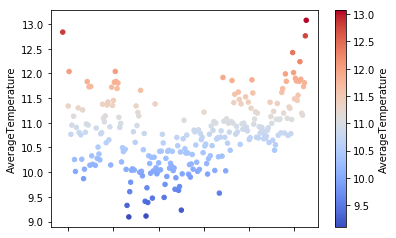

In [ ]:
# Average Temperature above 9 degrees
df_nine = dfa[dfa['AverageTemperature'] >= 9]
df_nine.plot.scatter(x='year', y='AverageTemperature', c = 'AverageTemperature', cmap ='coolwarm')

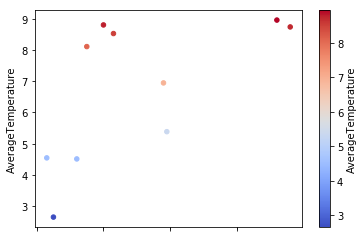

In [ ]:
# Average Temperature below 9 degrees
df_nine = dfa[dfa['AverageTemperature'] <= 9]
df_nine.plot.scatter(x='year', y='AverageTemperature', c = 'AverageTemperature', cmap ='coolwarm')

##### Next, create a new dataframe containing the average annual Carbon Dioxide levels in the atmosphere, and then used the Seaborn library to generate a linear relationship plot to visually observe how CO₂ levels have changed over the years.

Two main functions in seaborn are used to visualize a linear relationship as determined through regression. These functions, regplot() and lmplot() are closely related and share much of their core functionality. It is important to understand the ways they differ, however, so that you can quickly choose the correct tool for a particular job.

In the simplest invocation, both functions draw a scatterplot of two variables, x, and y, and then fit the regression model y ~ x and plot the resulting regression line and a 95% confidence interval for that regression.

In [ ]:
new_co2_df = CO2_df

In [ ]:
dfc = pd.DataFrame()

# Collecting all of the unique years
years = CO2_df['Year'].unique()

for i in years:
    df_avg = CO2_df[CO2_df['Year'] == i]['Carbon Dioxide (ppm)'].mean()
    df_new = (CO2_df[CO2_df['Year'] == i]).head(1)
    df_new['Carbon Dioxide (ppm)'] = df_avg
    dfc = dfc.append(df_new)
    
# Changing the Year column to year (lowercase)
dfc.rename(index=str, columns={"Year": "year"}, inplace=True)


# Dropping all of the unwanted columns
dfc.drop(['Seasonally Adjusted CO2 (ppm)', 
           'Carbon Dioxide Fit (ppm)', 
           'Seasonally Adjusted CO2 Fit (ppm)',
          'Decimal Date',
          'Month'], inplace=True, axis=1)

In [ ]:
dfc = dfc.dropna()

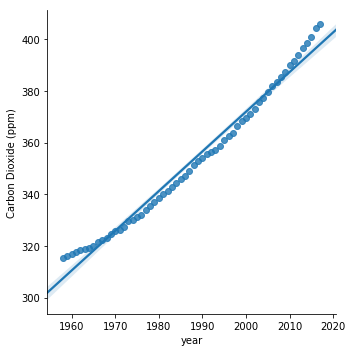

In [ ]:
sns.lmplot(x='year', y='Carbon Dioxide (ppm)', data=dfc)

##### This plot shows the increase in Carbon Dioxide in the atmosphere over a number of years. Unfortunately, during the 1760s which was when the 1st industrial revolution started our technology wasn’t advanced enough, and it wasn’t until 10 years after the 3rd industrial revolution that our technology has advanced so we could keep track of Carbon Dioxide in the atmosphere.

##### As you can see in the plot above, in 2010 we have reached almost 400 parts-per-million (ppm) of Carbon Dioxide globally. After discovering this result, I wanted to check if there were any correlation between the variables that were being studied.

##### Correlation is a statistical measure that indicates the extent to which two or more variables fluctuate together. A positive correlation indicates the extent to which those variables increase or decrease in parallel; a negative correlation indicates the extent to which one variable increases as the other decreases.

------

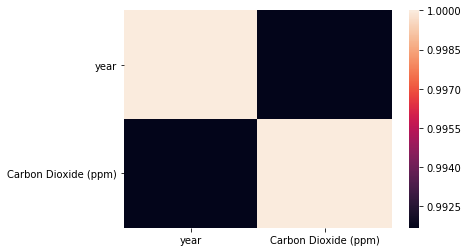

In [ ]:
sns.heatmap(dfc.corr())

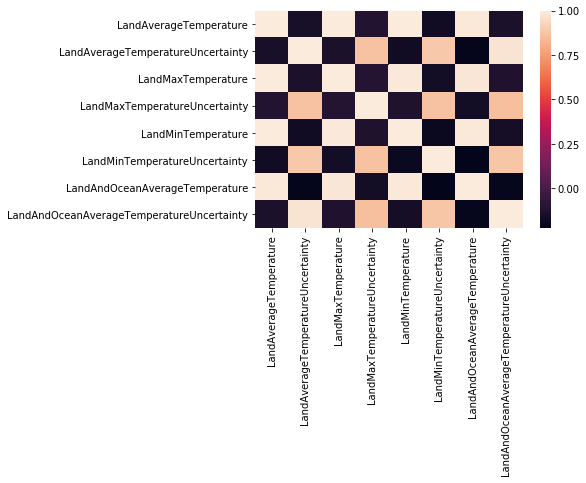

In [ ]:
sns.heatmap(global_temp.corr())

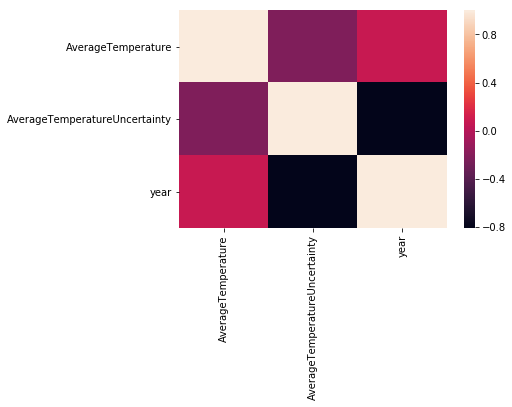

In [ ]:
sns.heatmap(temp_by_state.corr())

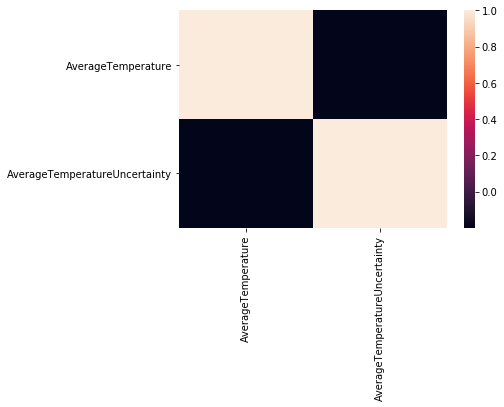

In [ ]:
sns.heatmap(temp_by_major_city.corr())

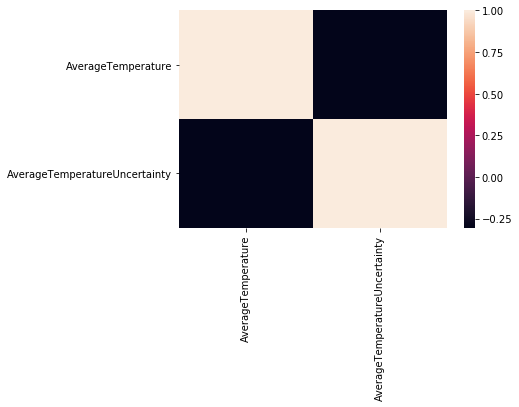

In [ ]:
sns.heatmap(temp_by_country.corr())

In [ ]:
CO2_df.rename(index=str, columns={"Year": "year"}, inplace=True)

In [ ]:
dfsc = pd.merge(dfa, CO2_df, on=['year']).dropna()

dfsc.drop(['Seasonally Adjusted CO2 (ppm)', 
           'Carbon Dioxide Fit (ppm)', 
           'Seasonally Adjusted CO2 Fit (ppm)',
          'Decimal Date',
          'Month'], inplace=True, axis=1)

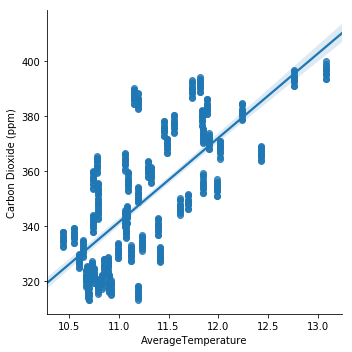

In [ ]:
sns.lmplot(x='AverageTemperature', y='Carbon Dioxide (ppm)', data = dfsc)

In [ ]:
import plotly
print(plotly.__version__)

5.18.0


##### After uncovering some key insights, I was interested in visualizing the average monthly CO₂ levels in the atmosphere, so I used the Plotly library, which enables the creation of interactive plots for better data exploration.

In [ ]:
import plotly.offline as py
import plotly.graph_objs as go
import datetime as dt

grp1 = CO2_df.groupby(["year"]).mean()["Carbon Dioxide (ppm)"]
trace1 = go.Bar(x=grp1.index, y=grp1.values)
layout = go.Layout(
    title="Average CO<sub>2</sub> Levels in Atmosphere per month",
    yaxis=dict(title="Parts per million (PPM)", range=(300,420)),
    xaxis=dict(title="Year"))
figure = go.Figure(data=[trace1], layout=layout)
py.iplot(figure, filename="co2-ppm-year")

##### This plot revealed that in 2017 the average level of CO₂ was 406.07 (ppm), which is a major swing compared to the level of CO₂ in 2010. Now, let’s check what does the Seasonal fluctuations of CO₂ levels are.



In [ ]:
group2 = CO2_df.groupby(["year", "Month"]).mean()["Carbon Dioxide (ppm)"]
x = [dt.datetime(year=i[0], month=i[1], day=15) for i in group2.index]

# Mean values.
y1 = group2.values

# Rolling window average
y2 = group2.rolling(3, min_periods=1).mean().values

# Exponentially weighted moving average
y3 = group2.ewm(span=3, min_periods=1).mean().values

In [ ]:
second_trace = go.Scatter(x=x, y=y1, mode="markers", name="Actual value")
third_trace = go.Scatter(x=x, y=y2, line=dict(color="red"), name="Rolling average")
forth_trace = go.Scatter(x=x, y=y3, line=dict(color="green"), name="EWM average")

default_period = (dt.datetime(2008, 1, 1), dt.datetime(2017,12,1))
default_ppm_range = (380, 410)
layout = go.Layout(
    title="Seasonal fluctations of CO<sub>2</sub> levels in atmosphere",
    yaxis=dict(title="Parts per million (PPM)",range=default_ppm_range),
    xaxis=dict(title="Year", range=default_period))

figure = go.Figure(data=[second_trace, third_trace, forth_trace], layout=layout)
py.iplot(figure, filename="co2-ppm-seasonal")

##### As mentioned before, all of these data visualizations done with plotly are interactive and allow you to interact with the variables themselves.

### These insights guided me to the next step: training a model to generate more data-driven conclusions. After training, I visualized and compared the actual CO₂ levels with the predicted ones—and the results were quite alarming.


In [ ]:
from sklearn import linear_model
from sklearn.model_selection  import train_test_split

x_val = [ (i.year, i.month, i.month ** 2, i.year ** 2) for i in x]
y_val = [ i for i in y1 ] 

x_train, x_test, y_train, y_test = train_test_split(x_val, y_val, test_size=0.40, random_state=45)
linearModel = linear_model.LinearRegression().fit(x_train, y_train)
print ("Accuracy: ", linearModel.score(x_test, y_test))

# predicted values
pred_value = linearModel.predict(x_val)

Accuracy:  0.996044541845825


In [ ]:
# Defining timeline of years
predicted_years = range(1950, 2055)
predicted_months = range(1, 13)

predicted_x = []
for y in predicted_years:
    for j in predicted_months:
        predicted_x.append([y, j, j ** 2, y ** 2])
        
# Predict values
predicted_y = linearModel.predict(predicted_x)


x_plot = [dt.datetime(i[0], i[1], 15) for i in predicted_x]
fifth_trace = go.Scatter(x=x_plot, y=predicted_y, line=dict(color="red"), name="Predicted value")

period_default = dt.datetime(1956, 1, 1), dt.datetime(2050,12,1)
ppm_range_def = (300, 500)
layout = go.Layout(
    title="Predicted Vs. Actual CO<sub>2</sub> Concentration levels",
    yaxis=dict(title="Parts per million (PPM)", range=ppm_range_def),
    xaxis=dict(title="Year", range=period_default))
figure = go.Figure(data=[second_trace, fifth_trace], layout=layout)
py.iplot(figure, filename="co2-ppm-prediction")

In [ ]:
# State that had the highest average temperature level
temp_by_state.loc[temp_by_state['AverageTemperature'].idxmax()]

dt                               2012-06-01
AverageTemperature                   36.339
AverageTemperatureUncertainty         0.385
State                                 Delhi
Country                               India
year                                   2012
Name: 116037, dtype: object

In [ ]:
# Country that had the highest Average Temperature
# Kuwait (Western Asia)
temp_by_country.loc[temp_by_country['AverageTemperature'].idxmax()]

dt                               2012-07-01
AverageTemperature                   38.842
AverageTemperatureUncertainty         0.464
Country                              Kuwait
Name: 284851, dtype: object

In [ ]:
temp_by_state.loc[temp_by_state['AverageTemperatureUncertainty'].idxmax()]

dt                                1768-01-01
AverageTemperature                    -9.102
AverageTemperatureUncertainty         12.646
State                            Kaliningrad
Country                               Russia
year                                    1768
Name: 202908, dtype: object

In [ ]:
def mod_year(date):
    """
    returns year from date time
    """
    for i in [date]:
        first = i.split('-')[0]
        return int(first)

In [ ]:
def mod_month(date):
    """
    returns month from date time
    """
    for i in [date]:
        second = i.split('-')[1]
        return int(second)

In [ ]:
temp_by_country['year'] = temp_by_country['dt'].apply(mod_year)
temp_by_country['month'] = temp_by_country['dt'].apply(mod_month)

In [ ]:
country_new_temp_data = pd.merge(temp_by_country, CO2_df, on=['year'])

In [ ]:
country_carbon = country_new_temp_data.groupby(["year", "month"]).mean()["Carbon Dioxide (ppm)"]
xx = [dt.datetime(year=i[0], month=i[1], day=15) for i in country_carbon.index]

# Mean values.
yy1 = country_carbon.values

# Rolling window average
yy2 = country_carbon.rolling(3, min_periods=1).mean().values

# Exponentially weighted moving average
yy3 = country_carbon.ewm(span=3, min_periods=1).mean().values

In [ ]:
second_country_trace = go.Scatter(x=xx, y=yy1, mode="markers", name="Actual value")
third_country_trace = go.Scatter(x=xx, y=yy2, line=dict(color="red"), name="Rolling average")
forth_country_trace = go.Scatter(x=xx, y=yy3, line=dict(color="green"), name="EWM average")

In [ ]:
x_values = [ (i.year, i.month, i.month ** 2, i.year ** 2) for i in x]
y_values = [ i for i in y1 ] 

x_train, x_test, y_train, y_test = train_test_split(x_values, y_values, test_size=0.40, random_state=45)
linearModel = linear_model.LinearRegression().fit(x_train, y_train)
print ("Accuracy: ", linearModel.score(x_test, y_test))

# predicted values
pred_value = linearModel.predict(x_values)

Accuracy:  0.996044541845825


In [ ]:
# country_new_temp_data['Country'].unique()
df1 = country_new_temp_data.groupby(['Country'])

In [ ]:
df2= df1.apply(lambda x: x.sort_values(["Carbon Dioxide (ppm)"]))

In [ ]:
df3=df2.reset_index(drop=True)
df3.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,year,month,Month,Decimal Date,Carbon Dioxide (ppm),Seasonally Adjusted CO2 (ppm),Carbon Dioxide Fit (ppm),Seasonally Adjusted CO2 Fit (ppm)
0,1958-10-01,13.910,0.320,Afghanistan,1958,10,9,1958.7068,313.21,316.06,312.48,315.35
1,1958-04-01,16.592,0.350,Afghanistan,1958,4,9,1958.7068,313.21,316.06,312.48,315.35
2,1958-06-01,25.091,0.502,Afghanistan,1958,6,9,1958.7068,313.21,316.06,312.48,315.35
3,1958-07-01,27.240,0.363,Afghanistan,1958,7,9,1958.7068,313.21,316.06,312.48,315.35
4,1958-08-01,24.639,0.436,Afghanistan,1958,8,9,1958.7068,313.21,316.06,312.48,315.35


In [ ]:
new_predicted_x = []
for y in predicted_years:
    for j in predicted_months:
        new_predicted_x.append([y, j, j ** 2, y ** 2])
        
# Predict values
new_predicted_y = linearModel.predict(new_predicted_x)


new_x_plot = [dt.datetime(i[0], i[1], 15) for i in new_predicted_x]
fifth_new_trace = go.Scatter(x=new_x_plot , y=new_predicted_y, line=dict(color="red"), name="Predicted value")

layout = go.Layout(
    title="Predicted Vs. Actual CO<sub>2</sub> Concentration levels",
    yaxis=dict(title="Parts per million (PPM)", range=ppm_range_def),
    xaxis=dict(title="Year", range=period_default))
figure = go.Figure(data=[second_country_trace, fifth_new_trace], layout=layout)
py.iplot(figure, filename="co2-ppm-prediction")

### As you can see in the plot above, I made sure to mark the year 2030. This was the year that the IPCC reported to the United Nations, that marks the deadline for changing our habits to reduce the levels of CO₂ in the atmosphere before irreversible damage is done. As you can see in January 2030 the predicted level of CO₂ in the atmosphere will be 437.3 (ppm). This is a massive change!

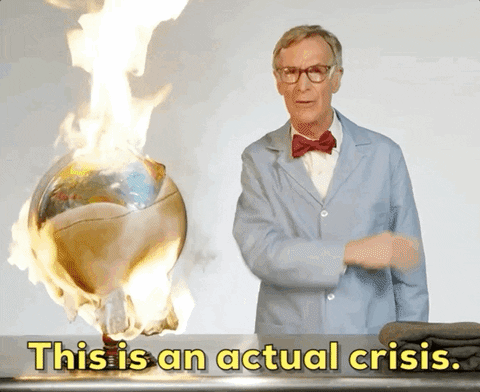

## If it isn’t clear by now that climate change is a real and urgent global issue, it’s time to revisit the facts—because immediate action is essential.

## Earth is our home planet and we must take care of it.

---------

## Conclusion and Insights

#### What are the issues will I be addressing on this EDA?

This project analyzed monthly CO₂ data from the Mauna Loa Observatory, offering valuable insights into long-term atmospheric carbon trends and their link to global temperature changes, highlighting the urgent need to address rising emissions.

#### What generally causes this kind of issue?

Earth’s temperature depends on the balance between energy entering and leaving the planet’s system. When incoming energy from the sun is absorbed by the Earth system, Earth warms. When the sun’s energy is reflected back into space, Earth avoids warming. When absorbed energy is released back into space, Earth cools. Many factors, both natural and human, can cause changes in Earth’s energy balance, including:

Variations in the sun’s energy reaching Earth

Changes in the reflectivity of Earth’s atmosphere and surface

Changes in the greenhouse effect, which affects the amount of heat retained by the Earth’s atmosphere

#### Why is this relevant and how Climate Change will affect me?

This project explored the underlying causes of global temperature changes by examining factors that disrupt Earth’s energy balance. While natural variations like solar intensity and surface reflectivity contribute to climate fluctuations, the most significant and concerning driver is the enhanced greenhouse effect caused by human activities. Increased concentrations of greenhouse gases, particularly CO₂, trap more heat in the atmosphere, leading to global warming. Understanding these mechanisms is crucial for developing effective strategies to mitigate climate change and restore balance to Earth’s climate system.

The Fourth National Climate Assessment (NCA4) is the most comprehensive U.S. report to date, providing an in-depth synthesis of climate change impacts, trends, and risks to guide informed decision-making and resilience efforts nationwide.


### Task: In summary, the initial analysis revealed missing values in the dataset—a common issue in real-world data—which were cleaned to ensure accurate insights and reliable model predictions.

### Task: Next, I created a new dataframe with yearly average CO₂ levels and used the Seaborn library to plot a linear trend, helping visualize how atmospheric CO₂ has changed over time.


#### Thank you.